# Logistic Regression with Regularization
This notebook implements logistic regression with L2 regularization using NumPy.

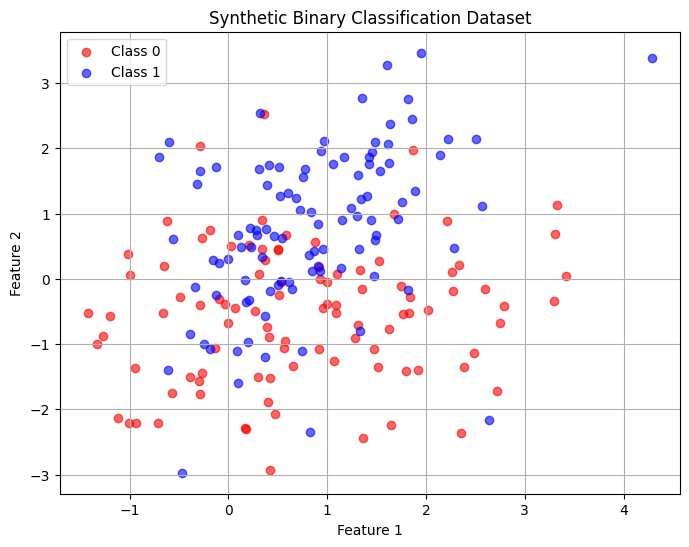

In [1]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

# Set a random seed for reproducibility
np.random.seed(42)

# Generate synthetic binary classification data
X, y = make_classification(
    n_samples=200,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=1,
    class_sep=0.8,
    flip_y=0.1,
    random_state=42
)

# Plot the dataset
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color="red", label="Class 0", alpha=0.6)
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color="blue", label="Class 1", alpha=0.6)
plt.title("Synthetic Binary Classification Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()


Final cost: 0.4956113585116045


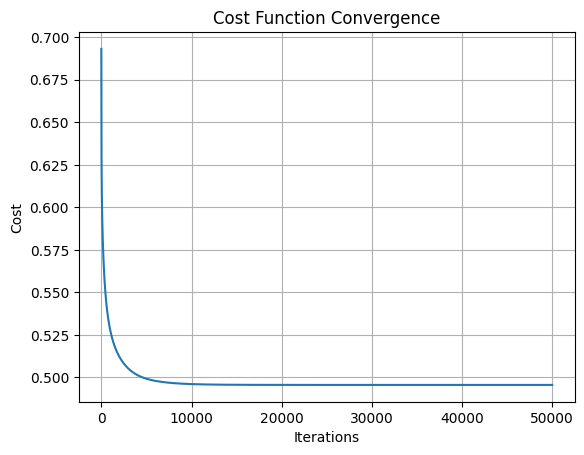

In [2]:

# Standardize the input features
x_mean = np.mean(X)
x_std = np.std(X)
x = (X - x_mean) / x_std

# Reshape label vector
y = y.reshape(-1, 1)

# Extract individual features
x1 = x[:, 0].reshape(-1, 1)
x2 = x[:, 1].reshape(-1, 1)

# Create polynomial features
x1_2 = x1 ** 2
x2_2 = x2 ** 2
x3 = x1 * x2
x1_3 = x1 ** 3
x2_3 = x2 ** 3
x1_x2_2 = x1 * (x1 ** 2)
x1_2_x2 = x2 * (x1 ** 2)

# Combine all features
x = np.hstack((x1, x2, x1_2, x2_2, x3, x1_3, x2_3, x1_x2_2, x1_2_x2))

# Initialize parameters
m = x.shape[0]
w = np.zeros((x.shape[1], 1))
b = 0
alpha = 0.01
lmb = 0.75
iteration = 50000
cost = []

# Gradient Descent with L2 Regularization
for _ in range(iteration):
    z = x @ w + b
    y_pred = 1 / (1 + np.exp(-z))
    loss = - (1 / m) * (np.sum(y * np.log(y_pred + 1e-6) + (1 - y) * np.log(1 - y_pred + 1e-6)))
    reg = (lmb / (2 * m)) * np.sum(w ** 2)
    j_regul = loss + reg
    cost.append(j_regul)
    
    # Gradient update
    w -= (alpha / m) * (x.T @ (y_pred - y) + lmb * w)
    b -= (alpha / m) * np.sum(y_pred - y)

# Print final cost and plot convergence
print("Final cost:", cost[-1])
plt.plot(cost)
plt.title("Cost Function Convergence")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.grid(True)
plt.show()


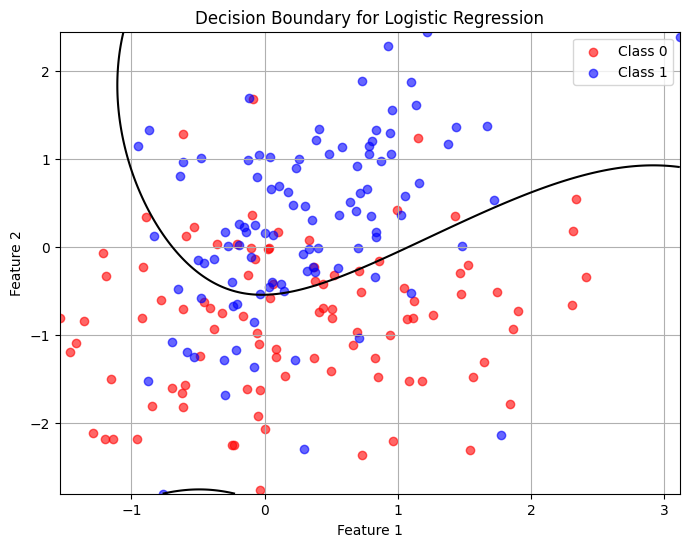

In [3]:

# Flatten label array
y = y.flatten()

# Plot the data points
plt.figure(figsize=(8, 6))
plt.scatter(x[y == 0][:, 0], x[y == 0][:, 1], color="red", label="Class 0", alpha=0.6)
plt.scatter(x[y == 1][:, 0], x[y == 1][:, 1], color="blue", label="Class 1", alpha=0.6)

# Create a grid over the feature space
x1_min, x1_max = x1.min(), x1.max()
x2_min, x2_max = x2.min(), x2.max()
x1_vals = np.linspace(x1_min, x1_max, 300)
x2_vals = np.linspace(x2_min, x2_max, 300)
X1, X2 = np.meshgrid(x1_vals, x2_vals)

# Generate polynomial features on the grid
x1_flat = X1.ravel().reshape(-1, 1)
x2_flat = X2.ravel().reshape(-1, 1)
x1_2 = x1_flat ** 2
x2_2 = x2_flat ** 2
x3 = x1_flat * x2_flat
x1_3 = x1_flat ** 3
x2_3 = x2_flat ** 3
x1_x2_2 = x1_flat * (x1_flat ** 2)
x1_2_x2 = x2_flat * (x1_flat ** 2)

X_grid = np.hstack((x1_flat, x2_flat, x1_2, x2_2, x3, x1_3, x2_3, x1_x2_2, x1_2_x2))

# Predict on the grid
z_grid = X_grid @ w + b
y_grid_pred = 1 / (1 + np.exp(-z_grid))
y_grid_pred = y_grid_pred.reshape(X1.shape)

# Plot decision boundary
plt.contour(X1, X2, y_grid_pred, levels=[0.5], colors='black')
plt.title("Decision Boundary for Logistic Regression")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()
